### Logistic Regression

- used to solve classification problems
- It's Binary classification

In [20]:
import pandas as pd

data = {
    "age": [
        22, 25, 47, 52, 46, 56, 55, 60, 62, 61,
        18, 28, 27, 29, 49,23,67,56,43,12,66,11,32,87,45,75
    ],
    "have_insurance": [
        0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 1,1,1,1,1,0,1,1,0,0,1,1
    ]
}

df = pd.DataFrame(data)
print(df)


    age  have_insurance
0    22               0
1    25               0
2    47               1
3    52               0
4    46               1
5    56               1
6    55               0
7    60               1
8    62               1
9    61               1
10   18               0
11   28               0
12   27               0
13   29               0
14   49               1
15   23               1
16   67               1
17   56               1
18   43               1
19   12               0
20   66               1
21   11               1
22   32               0
23   87               0
24   45               1
25   75               1


The graph should be linearly seperable

To find the equation of the line, we use:

The general equation of a straight line

$$
Ax_1 + Bx_2 + C = 0
$$

The linear combination (logit) is:

$$
z = w_1 x_1 + w_2 x_2 + w_0
$$


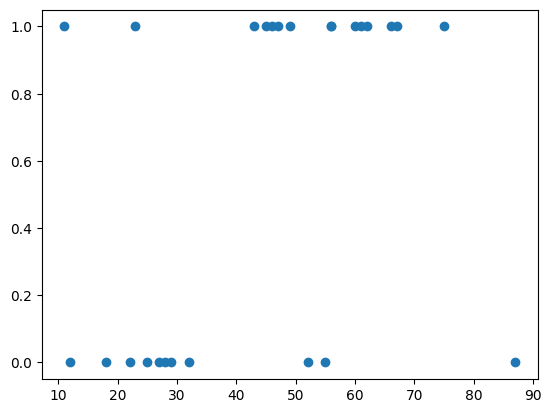

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df['age'],df['have_insurance'])

there are some outliers in this dataset 
to deal with that we need sigmoid function

#### <u>The sigmoid function</u>

$$
\text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$

Where:

- $e$ = Euler's number $\approx 2.71828$

even if the value of z varies between -inf to inf , y value will be in btn -1 and 1

##### Step 1: Linear score (logit)
$$
z = \sum_{i=1}^{n} w_i x_i
$$

Linear score(logit) is the raw output of the linear equation before applying sigmoid

Logits are used before the sigmoid because probabilities (0–1) are hard to model linearly, but log-odds are easy to model linearly.

- it turns probability into a straght line 
- Features → Linear score (logit) → Sigmoid → Probability → Class
- The logit equation is:

$$
\ln\left(\frac{p}{1 - p}\right)
= z
= w_1 x_1 + w_2 x_2 + \cdots + b
$$

Where:

- $p$ : Predicted probability that the output belongs to class 1  
- $1 - p$ : Probability that the output belongs to class 0  
- $\ln$ : Natural logarithm  
- $\ln\left(\frac{p}{1 - p}\right)$ : Logit (log-odds)  
- $z$ : Linear score (logit value before sigmoid)  
- $w_1, w_2, \ldots$ : Model weights (coefficients)  
- $x_1, x_2, \ldots$ : Input feature values  
- $b$ : Bias (intercept) term  



---

##### Step 2: Convert to probability (Sigmoid function)

Sigmoid is used to convert the logit output into probabilities, and these probabilities are used to compute the loss, whose gradient is then used to update the feature weights.

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

##### Step 3: Compare with actual label
$$
\text{error} = y - \hat{y}
$$

---

##### Step 4: Update weight
$$
w_i = w_i + \eta (y - \hat{y}) x_i
$$

Inputs → Linear sum → Sigmoid → Probability
                ↓
            Error
                ↓
         Weight update

What changes?
- The weights are slightly different
- This changes the linear score (logit) for the same input
- Which changes the probability next time
👉 The model has learned a little from its mistake.



The Softmax function is:

$$
P_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

Where:

- $P_i$ : Probability of class $i$  
- $z_i$ : Score (logit) for class $i$  
- $K$ : Total number of classes  
- $e$ : Euler's number ($\approx 2.71828$)



| Scenario                       | Function Used | Purpose                   |
| ------------------------------ | ------------- | ------------------------- |
| Binary Logistic Regression     | **Sigmoid**   | Probability of class 1    |
| Multiclass Logistic Regression | **Softmax**   | Probability of each class |


In [22]:
df.shape

(26, 2)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df['have_insurance'],train_size=0.9)

In [25]:
len(x_train)

23

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model=LogisticRegression()

In [28]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
x_test

,age
7,60
10,18
19,12


In [30]:
model.predict(x_test)

array([1, 0, 0])

In [31]:
model.score(x_test,y_test)

1.0

In [32]:
model.predict_proba(x_test)

array([[0.28174425, 0.71825575],
       [0.61025788, 0.38974212],
       [0.65614063, 0.34385937]])

In [35]:
model.predict([[25]])

d:\Data_Science\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])